In [ ]:
path = r'D:\OneDrive - NITT\Desktop\New folder\CountingInput_2024-02-02-054519-min.jpg'

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# https://stackoverflow.com/questions/22317011/find-all-circles-in-image
def draw_circles(img, circles):
    # img = cv2.imread(img,0)
    cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    for i in circles[0,:]:
        i = i.astype(int)
    # draw the outer circle
        cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
        cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
        cv2.putText(cimg,str(i[0])+str(',')+str(i[1]), (i[0],i[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.4, 255)
    return cimg


def detect_circles(image_path):
    gray = cv2.imread(image_path, 0)
    plt.imshow(gray)
    plt.show()
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 2, 60, param2=100, minRadius=20, maxRadius=40)
    cimg = draw_circles(gray, circles)
    print("{} circles detected.".format(circles[0].shape[0]))
    return cimg

def detect_circles(image_path):
    gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    gray_blur = cv2.medianBlur(gray, 13)  # Remove noise before laplacian
    gray_lap = cv2.Laplacian(gray_blur, cv2.CV_8UC1, ksize=5)
    dilate_lap = cv2.dilate(gray_lap, (3, 3))  # Fill in gaps from blurring. This helps to detect circles with broken edges.
    # Furture remove noise introduced by laplacian. This removes false pos in space between the two groups of circles.
    lap_blur = cv2.bilateralFilter(dilate_lap, 5, 9, 9)
    # Fix the resolution to 16. This helps it find more circles. Also, set distance between circles to 55 by measuring dist in image.
    # Minimum radius and max radius are also set by examining the image.
#     circles = cv2.HoughCircles(lap_blur, cv2.HOUGH_GRADIENT, 16, 55, param2=450, minRadius=20, maxRadius=40)
    circles = cv2.HoughCircles(lap_blur, cv2.HOUGH_GRADIENT, 2, 60, param2=100, minRadius=20, maxRadius=40)
    cimg = draw_circles(gray, circles)
    print("{} circles detected.".format(circles[0].shape[0]))
    # There are some false positives left in the regions containing the numbers.
    # They can be filtered out based on their y-coordinates if your images are aligned to a canonical axis.
    # I'll leave that to you.
    return cimg

In [ ]:
newimg = detect_circles(path) #EVNlt.png

In [ ]:
plt.imshow(newimg)
plt.show()

In [ ]:
# plt.imshow(gray)

In [ ]:
gray = cv2.imread('EVNlt.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
def draw_circles(img, circles):
    cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    for indx,i in enumerate(circles[0,:]):
    # draw the outer circle
#         cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
#         cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
        if indx<len(circles[0,:])-1:
            cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
            cv2.putText(cimg, str(indx+1), (i[0], i[1]), cv2.FONT_HERSHEY_SIMPLEX, 2.5, (50, 50, 50), thickness=3)
        else:
            cv2.circle(cimg,(i[0],i[1]),i[2],(255, 0, 0),3)
            cv2.putText(cimg, str(indx+1), (i[0], i[1]), cv2.FONT_HERSHEY_SIMPLEX, 2.5, (255, 0, 0), thickness=4)

#         cv2.putText(cimg,str(indx), (i[0],i[1]), cv2.FONT_HERSHEY_SIMPLEX, 3, 255)
#         cv2.putText(cimg,str(i[0])+str(',')+str(i[1]), (i[0],i[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.4, 255)
    return cimg

def detect_circles(image_path):
    gray = cv2.imread(image_path, 0)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=60, param2=30, minRadius=110, maxRadius=140)
#     print(circles)
    circles = circles.round().astype("int")
    cimg = draw_circles(gray, circles)
    print("{} circles detected.".format(circles[0].shape[0]))
    return cimg

In [4]:
import os

In [5]:
paths = os.listdir(r'D:\OneDrive - NITT\Desktop\New folder')

In [6]:
all_paths = [os.path.join(r'D:\OneDrive - NITT\Desktop\New folder',i) for i in paths if i.endswith('.jpg')]
all_paths

['D:\\OneDrive - NITT\\Desktop\\New folder\\CountingInput_2024-01-30-065316-min.jpg',
 'D:\\OneDrive - NITT\\Desktop\\New folder\\CountingInput_2024-01-30-065412-min.jpg',
 'D:\\OneDrive - NITT\\Desktop\\New folder\\CountingInput_2024-02-01-055757-min.jpg',
 'D:\\OneDrive - NITT\\Desktop\\New folder\\CountingInput_2024-02-01-061130-min.jpg',
 'D:\\OneDrive - NITT\\Desktop\\New folder\\CountingInput_2024-02-02-054519-min.jpg',
 'D:\\OneDrive - NITT\\Desktop\\New folder\\CountingInput_2024-02-02-054556-min.jpg',
 'D:\\OneDrive - NITT\\Desktop\\New folder\\CountingInput_2024-02-02-055135-min.jpg',
 'D:\\OneDrive - NITT\\Desktop\\New folder\\CountingInput_2024-02-02-063205-min.jpg']

In [8]:
# for indx,path in enumerate(all_paths):
#     c = detect_circles(path)
#     plt.imshow(c)
#     plt.imsave(f'{indx}.png',c)

# NEW CODE

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [44]:
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred


def draw_circles(img, circles):
    cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    for indx,i in enumerate(circles[0,:]):
    # draw the outer circle
#         cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
#         cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
        if indx<len(circles[0,:])-1:
            cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
            cv2.putText(cimg, str(i[2]), (i[0], i[1]), cv2.FONT_HERSHEY_SIMPLEX, 2.5, (50, 50, 50), thickness=3)
        else:
            cv2.circle(cimg,(i[0],i[1]),i[2],(255, 0, 0),3)
            cv2.putText(cimg, str(i[2]), (i[0], i[1]), cv2.FONT_HERSHEY_SIMPLEX, 2.5, (255, 0, 0), thickness=4)

#         cv2.putText(cimg,str(indx), (i[0],i[1]), cv2.FONT_HERSHEY_SIMPLEX, 3, 255)
#         cv2.putText(cimg,str(i[0])+str(',')+str(i[1]), (i[0],i[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.4, 255)
    return cimg

def detect_circles(image_path):
#     gray = cv2.imread(image_path, 0)
    image = cv2.imread(image_path)
    gray = preprocess_image(image)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=60, param2=30, minRadius=110, maxRadius=140)
#     print(circles)
    circles = circles.round().astype("int")
    print(circles)
    cimg = draw_circles(gray, circles)
    print("{} circles detected.".format(circles[0].shape[0]))
    return cimg


# def detect_circles(image_path):
#     image = cv2.imread(image_path)
#     gray = preprocess_image(image)
#     # Adjust the parameters of HoughCircles
#     circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=60, param2=30, minRadius=110, maxRadius=140)
#     if circles is not None:
#         circles = circles.round().astype("int")
#         cimg = draw_circles(gray, circles)
#         print("{} circles detected.".format(circles[0].shape[0]))
#         return cimg
#     else:
#         print("No circles detected.")


In [45]:
pth = r'D:\\OneDrive - NITT\\Desktop\\New folder\\CountingInput_2024-02-02-063205-min.jpg'

[[[ 360 2696  125]
  [2858 1948  124]
  [1408  670  124]
  [ 200 1656  124]
  [2000 3318  128]
  [1466 3346  126]
  [1194 3324  127]
  [ 162 1922  126]
  [ 508 2918  125]
  [1674  672  124]
  [2404  988  123]
  [2720 1416  125]
  [ 872  822  124]
  [2828 1676  123]
  [1936  732  124]
  [1118  726  125]
  [2184  838  123]
  [2656 2728  126]
  [ 650  974  125]
  [2774 2488  128]
  [ 168 2196  131]
  [ 302 1396  125]
  [2850 2218  121]
  [2594 1186  118]
  [ 238 2442  133]
  [ 710 3094  126]
  [ 942 3236  128]
  [ 446 1178  131]
  [1730 3334  131]
  [ 700 2748  111]
  [ 566 2566  121]
  [ 994 1050  111]
  [2060 1064  111]
  [1252 3084  112]
  [1050 3018  116]
  [ 868 2906  123]
  [1476 3102  111]
  [2386 1350  114]
  [2508 1538  124]
  [ 452 1724  116]
  [ 804 1172  117]
  [1424  912  128]
  [2594 1746  126]
  [2614 1970  124]
  [2248 1176  134]
  [1642  908  136]
  [2598 2184  112]]]
47 circles detected.


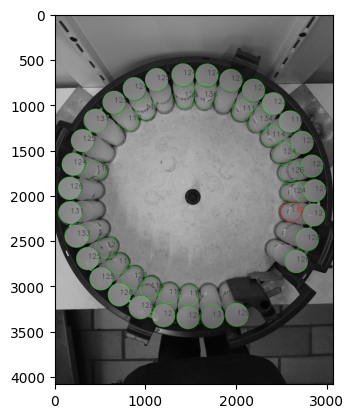

In [46]:
# image = cv2.imread(pth)
# image = cv2.GaussianBlur(image, (15, 15), 0)
# plt.imshow(image)

c = detect_circles(pth)
plt.imshow(c)

In [11]:
plt.imsave('cc.png',c)      

In [ ]:
# sure background area
sure_bg = cv2.erode(mask, kernel)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(mask,cv2.DIST_L2,5)
cv2_imshow(dist_transform)# Draw sure figure from distance transform
ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0) 
# 0.2 is important, the bigger it is, the object is smaller (to the object center)
sure_fg = np.uint8(sure_fg)#Find contour for sure figure
contours, hierarchy = cv2.findContours(sure_fg.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)count = 0
result = c.copy()
for i in range(len(contours)):
     if radius[i] > averageRadius * diff_average_radius:
         count += 1
         cv2.circle(........) # Draw circle
         cv2.putText(.......) # Put text
cv2_imshow(result)

1 circles detected.


AttributeError: 'NoneType' object has no attribute 'round'

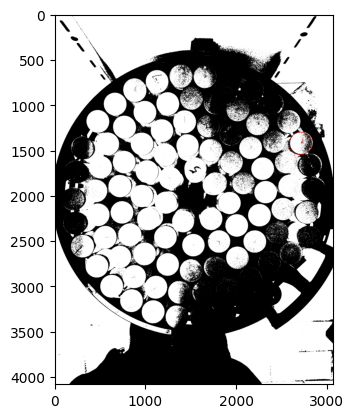

In [58]:
# plt.imshow(detect_circles(pth))
# plt.imsave(''.png',c)

for indx,path in enumerate(all_paths):
    c = detect_circles(path)
    plt.imshow(c)
    plt.imsave(f'{indx}.png',c)           

In [ ]:
# https://stackoverflow.com/questions/22317011/find-all-circles-in-image
# https://www.geeksforgeeks.org/opencv-python-tutorial/
# https://stackoverflow.com/questions/59931448/how-to-improve-circle-detection


In [45]:
import cv2
import numpy as np

# Load the image
image = cv2.imread(pth)

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds of the orange color in HSV
lower_orange = np.array([10, 100, 100])
upper_orange = np.array([30, 255, 255])

# Create a mask for the orange color
mask = cv2.inRange(hsv, lower_orange, upper_orange)

circles = cv2.HoughCircles(mask, cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=50, param2=10, minRadius=110, maxRadius=140)
circles = circles.round().astype("int")
cimg = draw_circles(mask, circles)

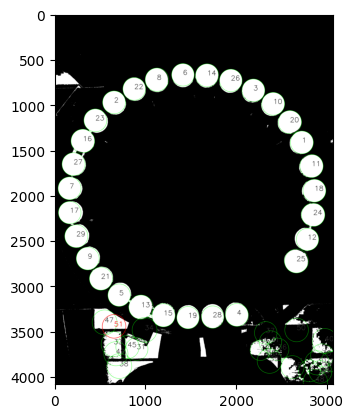

In [46]:
plt.imshow(cimg)

In [5]:
pth

NameError: name 'pth' is not defined

In [15]:
import cv2
import numpy as np

# Read the image
image = cv2.imread(pth)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image
ret, thresh = cv2.threshold(gray, 127, 255, 0)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through each contour
for contour in contours:
    # Calculate the moments of the contour
    M = cv2.moments(contour)
    
    try:
        # Calculate the mass center
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])

        # Calculate the radius from the mass center to each contour point
        distances = [np.linalg.norm(np.array(point[0]) - np.array([cx, cy])) for point in contour]

        # Check if all distances are approximately equal
        if np.allclose(distances, distances[0], atol=5):
            # Draw a circle around the contour
            cv2.circle(image, (cx, cy), int(distances[0]), (0, 255, 0), 2)
    except:
        pass
# # Display the result
# cv2.imshow('Circles Detected', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


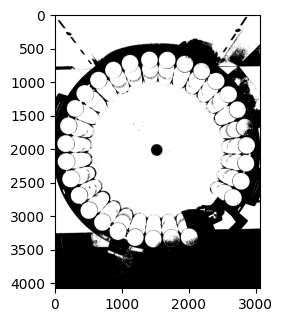

In [18]:
# Importing Necessary Libraries
# Displaying the sample image - Monochrome Format
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Sample Image of scikit-image package
coffee = cv2.imread(pth)
gray_coffee = rgb2gray(coffee)
binarized_gray = (gray_coffee > 3*0.1)*1
# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

# for i in range(10):

# Iterating different thresholds
binarized_gray = (gray_coffee > 3*0.1)*1
plt.subplot(5,2,i+1)

# Rounding of the threshold
# value to 1 decimal point
# plt.title("Threshold: >"+str(round(i*0.1,1)))

# Displaying the binarized image
# of various thresholds
plt.imshow(binarized_gray, cmap = 'gray')

plt.tight_layout()


In [32]:
cv2.HoughCircles(binarized_gray, cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=60, param2=20, minRadius=10, maxRadius=100)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\hough.cpp:2269: error: (-215:Assertion failed) !_image.empty() && _image.type() == CV_8UC1 && (_image.isMat() || _image.isUMat()) in function 'cv::HoughCircles'


In [12]:
import cv2

# Load the image
image = cv2.imread(pth)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization to increase contrast
equ = cv2.equalizeHist(gray)

# Stack the original and equalized images horizontally for comparison
result = np.hstack((gray, equ))

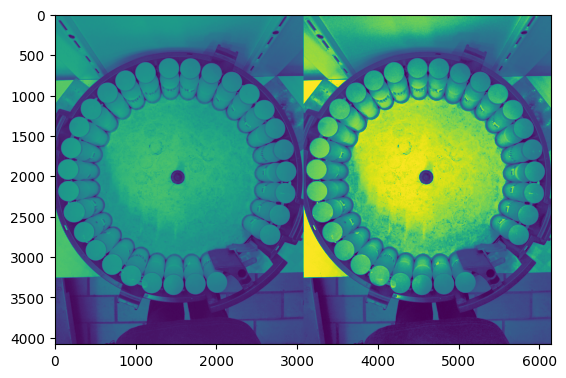

In [13]:
plt.imshow(result)

In [14]:
# - contrast
# - segmentation
# - hogue
# - https://www.geeksforgeeks.org/image-segmentation-using-pythons-scikit-image-module/

In [33]:
import cv2

def sharpen_image(image):
    # Define the sharpening kernel
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

    # Apply the sharpening filter
    sharpened_image = cv2.filter2D(image, -1, kernel)

    return sharpened_image

img = cv2.imread(pth)
# Assuming img is your image array
sharpened_img = sharpen_image(img)


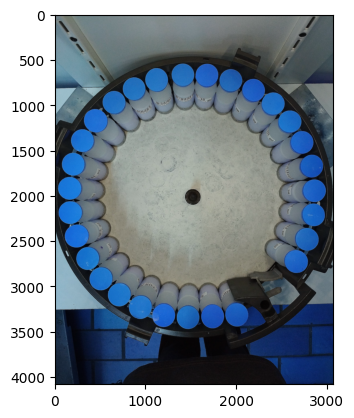

In [34]:
plt.imshow(sharpened_img)